<a href="https://colab.research.google.com/github/ricardo-casa/ReconocimientoPatrones/blob/main/Practicas/Practica2/practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 
from PIL import ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import os
from copy import deepcopy
from colorsys import rgb_to_hsv

In [ ]:
origin = 'data/comida/'
images = os.listdir(origin)
size = (256,256)

In [ ]:
x_train, x_test = train_test_split(images, test_size=0.2, random_state=1)
print(x_train, x_test)

['Entrenamiento2.jpg', 'Entrenamiento1.jpg', 'Prueba1.jpg', 'Entrenamiento4.jpg', 'Prueba2.jpg'] ['Prueba3.jpg', 'Entrenamiento3.jpg']


In [ ]:
def preprocess(image): 
    processed_image = cv2.imread(origin + image)
    processed_image = cv2.resize(processed_image, size)
    #cv2.imshow('image',image)
    #cv2.waitKey(5000)
    processed_image = cv2.GaussianBlur(processed_image, (15, 15), 8)  
    return processed_image

Preprocessing Training Set

In [ ]:
X_train = []
for image in x_train: 
    blurred = preprocess(image)
    X_train.append(blurred)

X_train

[array([[[ 61,  90, 222],
         [ 61,  90, 222],
         [ 61,  91, 222],
         ...,
         [ 57,  83, 223],
         [ 57,  82, 223],
         [ 57,  82, 223]],
 
        [[ 61,  90, 222],
         [ 61,  90, 222],
         [ 61,  90, 222],
         ...,
         [ 57,  83, 223],
         [ 57,  82, 223],
         [ 57,  82, 223]],
 
        [[ 61,  90, 222],
         [ 61,  90, 222],
         [ 61,  90, 222],
         ...,
         [ 57,  83, 223],
         [ 57,  82, 223],
         [ 57,  82, 223]],
 
        ...,
 
        [[ 68, 109, 221],
         [ 68, 109, 221],
         [ 68, 109, 221],
         ...,
         [ 65,  96, 225],
         [ 65,  97, 225],
         [ 65,  97, 225]],
 
        [[ 68, 109, 221],
         [ 68, 109, 221],
         [ 68, 109, 221],
         ...,
         [ 65,  96, 225],
         [ 65,  96, 225],
         [ 65,  96, 225]],
 
        [[ 68, 109, 221],
         [ 68, 109, 221],
         [ 68, 109, 221],
         ...,
         [ 65,  96, 225],
  

Preprocessing Test Set

In [ ]:
X_test = []
for image in x_test: 
    blurred = preprocess(image)
    X_test.append(blurred)
    
X_test

[array([[[ 58,  95, 223],
         [ 58,  95, 223],
         [ 58,  95, 224],
         ...,
         [ 55,  86, 224],
         [ 56,  87, 224],
         [ 56,  87, 224]],
 
        [[ 58,  95, 223],
         [ 58,  95, 224],
         [ 58,  95, 224],
         ...,
         [ 55,  86, 224],
         [ 56,  87, 224],
         [ 56,  87, 224]],
 
        [[ 58,  95, 223],
         [ 58,  95, 224],
         [ 58,  95, 224],
         ...,
         [ 56,  86, 224],
         [ 56,  87, 224],
         [ 56,  87, 224]],
 
        ...,
 
        [[ 55,  93, 220],
         [ 55,  93, 220],
         [ 55,  93, 220],
         ...,
         [ 56,  86, 223],
         [ 56,  85, 223],
         [ 56,  85, 223]],
 
        [[ 56,  93, 220],
         [ 56,  93, 220],
         [ 56,  93, 220],
         ...,
         [ 56,  86, 223],
         [ 56,  85, 223],
         [ 56,  85, 223]],
 
        [[ 56,  94, 220],
         [ 56,  94, 220],
         [ 56,  94, 220],
         ...,
         [ 56,  86, 223],
  

In [ ]:
del x_train
del x_test

In [ ]:
def mask_eggs(image): 
    im = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    eggs_mask = deepcopy(im)

    for h in range(len(image)):
        for w in range(len(image)):

            if gray[h][w] not in range(230, 255):  # eggs
                eggs_mask[h][w][:] = 255
            else: 
                continue
    return eggs_mask

In [ ]:
def mask_bananas(image): 
    im = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    banana_mask = deepcopy(im)

    for h in range(len(image)):
        for w in range(len(image)):

            if gray[h][w] not in range(140, 180):  # eggs
                banana_mask[h][w][:] = 255
    return banana_mask

In [ ]:
def mask_peppers(image): 
    im = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    pepper_mask = deepcopy(im)

    for h in range(len(image)):
        for w in range(len(image)):

            if gray[h][w] not in range(35, 85):  # eggs
                pepper_mask[h][w][:] = 255
    return pepper_mask

Creando mascaras para las categorias: huevo, platano, chile

In [ ]:
eggs_masks = []
banana_masks = []
pepper_masks = []

for image in X_train:
    eggs_masks.append(mask_eggs(image))
    banana_masks.append(mask_bananas(image))
    pepper_masks.append(mask_peppers(image))

In [ ]:
def show_gallery(images):
    for num, image in enumerate(images):
        plt.subplot(1,5,num+1)
        plt.title('mask' + str(num+1))
        plt.axis('off')
        plt.imshow(image)

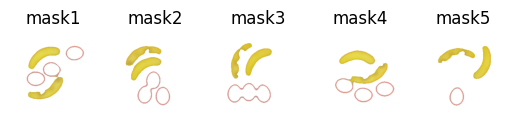

In [ ]:
show_gallery(banana_masks)

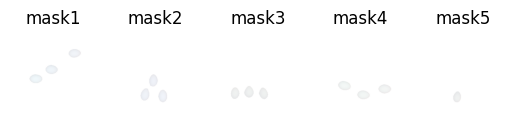

In [ ]:
show_gallery(eggs_masks)

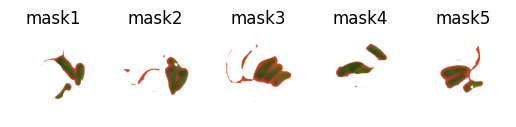

In [ ]:
show_gallery(pepper_masks)

Obteniendo probabilidades individuales por clase

In [ ]:
eggs_prob =  np.sum(eggs_masks, where=eggs_masks[:]!=255) / (3 * len(X_train) * size[0]**2)
banana_prob =  np.sum(banana_masks, where=banana_masks[:]!=255) / (3 * len(X_train) * size[0]**2)

banana_prob 

246.21580403645834